In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import metrics

In [76]:
ames = pd.read_csv('./datasets/train.csv')

In [77]:
ames.shape

(2051, 81)

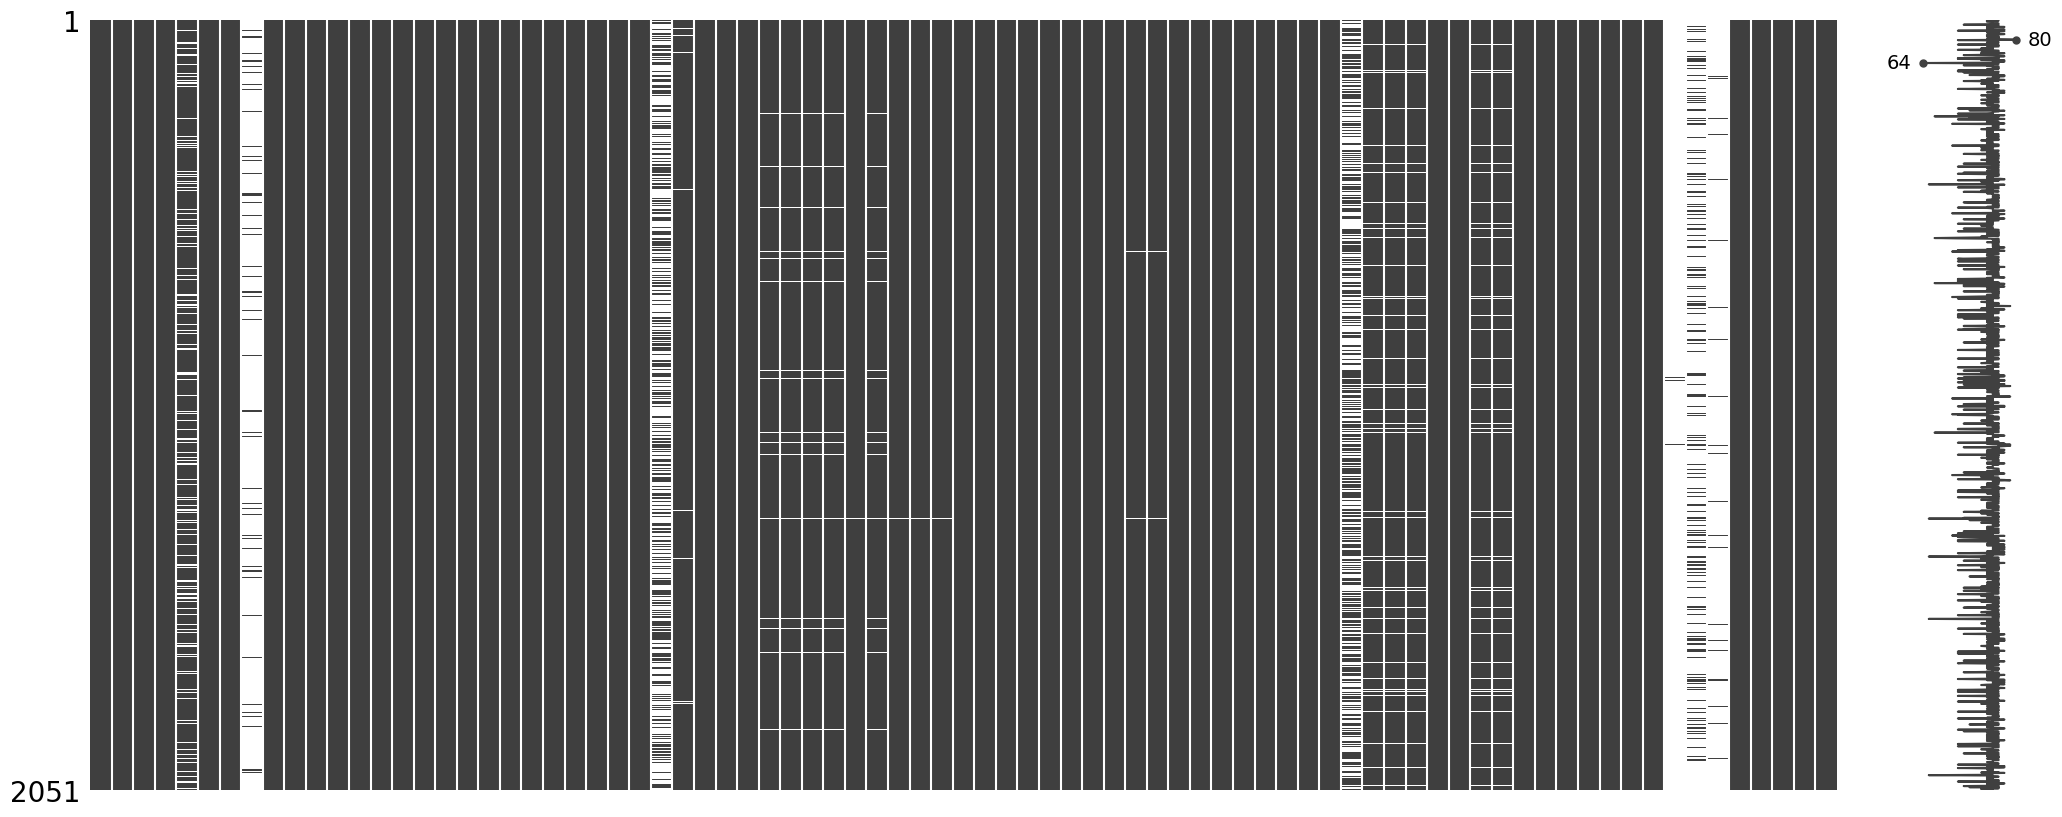

In [78]:
import missingno as msno
msno.matrix(ames);

## 1. Data Cleaning & EDA

In [79]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [80]:
# delete columns with less than 40% of data and one of the columns with duplicate values 
ames = ames.drop(columns = ['Garage Qual','Condition 1','Misc Feature', 'Fence','Pool QC', 'Fireplace Qu','Mas Vnr Type', 'Alley'])

In [81]:
# replace empty columns with NaN
ames = ames.replace(' ', np.nan)
ames = ames.replace('nan', np.nan)
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 73 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Lot Shape        2051 non-null   object 
 8   Land Contour     2051 non-null   object 
 9   Utilities        2051 non-null   object 
 10  Lot Config       2051 non-null   object 
 11  Land Slope       2051 non-null   object 
 12  Neighborhood     2051 non-null   object 
 13  Condition 2      2051 non-null   object 
 14  Bldg Type        2051 non-null   object 
 15  House Style      2051 non-null   object 
 16  Overall Qual     2051 non-null   int64  
 17  Overall Cond  

In [82]:
ames = ames.replace(' ', np.nan)
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 73 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Lot Shape        2051 non-null   object 
 8   Land Contour     2051 non-null   object 
 9   Utilities        2051 non-null   object 
 10  Lot Config       2051 non-null   object 
 11  Land Slope       2051 non-null   object 
 12  Neighborhood     2051 non-null   object 
 13  Condition 2      2051 non-null   object 
 14  Bldg Type        2051 non-null   object 
 15  House Style      2051 non-null   object 
 16  Overall Qual     2051 non-null   int64  
 17  Overall Cond  

In [83]:
# there is strong reletionship between year of house built and garage bult
cols = ['Year Built', 'Garage Yr Blt']
ames[cols].corr()

,Year Built,Garage Yr Blt
Year Built,1.000000,0.825316
Garage Yr Blt,0.825316,1.000000


In [84]:
# filled empty 'Garage Yr Blt' cells with Year Built values from the same series.

ames['Garage Yr Blt'] = ames['Garage Yr Blt'].fillna(ames['Year Built'])

In [85]:
cols = ['Year Built', 'Garage Yr Blt']
ames[cols].corr()

,Year Built,Garage Yr Blt
Year Built,1.00000,0.84661
Garage Yr Blt,0.84661,1.00000


In [86]:
# missing values in int and float columns  filled with their mean values
ames = ames.fillna(ames[['Garage Area', 'Garage Cars', 'Bsmt Half Bath', 
               'Bsmt Full Bath', 'Total Bsmt SF', 'Bsmt Unf SF', 
               'BsmtFin SF 2', 'BsmtFin SF 1', 'Mas Vnr Area', 'Lot Frontage']].mean())

In [87]:
# missing values in object columns filled with their mode value
for column in ['Garage Cond', 'Garage Finish', 'Garage Type', 'BsmtFin Type 2', 
                         'BsmtFin Type 1', 'Bsmt Exposure', 'Bsmt Cond', 'Bsmt Qual']: ames[column].fillna(ames[column].mode()[0], inplace=True)

In [88]:
# ames.info()

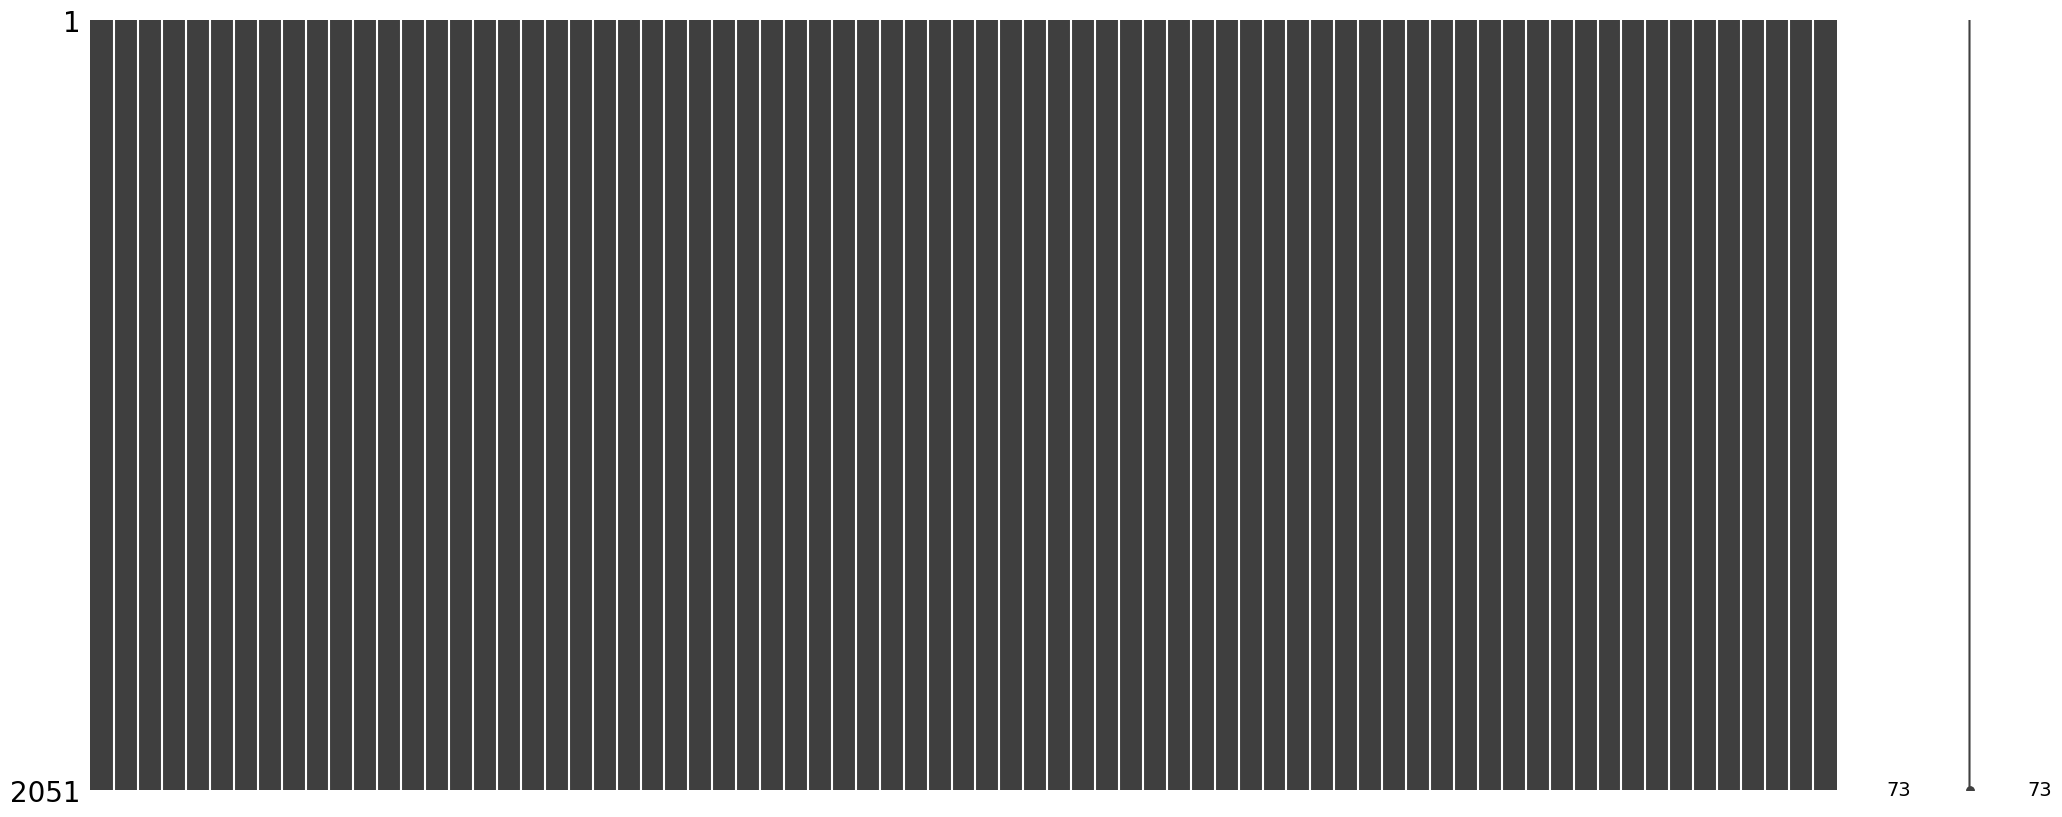

In [89]:
msno.matrix(ames);

In [90]:
ames.shape

(2051, 73)

In [91]:
ames['SalePrice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

In [92]:
ames.to_csv('./datasets/clean_data_before_dropna.csv', index = False)

There are are outliers in 'Sale Price'.

# 2. Preprocessing

#### Dummy catagorical variables with OneHotEncoder

In [93]:
# extract columns with catagorical_variables
dat_types = ames.dtypes
cat_cols = dat_types[dat_types == 'object'].index
cat_colsX = ames[cat_cols]
cat_colsX.shape

(2051, 34)

In [94]:
# apply OneHotEncoder to dummify catagorical variables
ohe = OneHotEncoder(drop='first', sparse_output = False).set_output(transform = 'pandas')
ohetransform = ohe.fit_transform(cat_colsX)

In [95]:
ohetransform.shape

(2051, 181)

In [96]:
ohetransform.head()

,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,...,Paved Drive_P,Paved Drive_Y,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [97]:
ohetransform['Street_Pave'].dtype

dtype('float64')

In [98]:
num_cols = ames.select_dtypes(include = [np.number])
num_cols.shape

(2051, 39)

In [99]:
num_cols.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,109,533352170,60,69.0552,13517,6,8,1976,2005,289.0,...,0,44,0,0,0,0,0,3,2010,130500
1,544,531379050,60,43.0000,11492,7,5,1996,1997,132.0,...,0,74,0,0,0,0,0,4,2009,220000
2,153,535304180,20,68.0000,7922,5,7,1953,2007,0.0,...,0,52,0,0,0,0,0,1,2010,109000
3,318,916386060,60,73.0000,9802,5,5,2006,2007,0.0,...,100,0,0,0,0,0,0,4,2010,174000
4,255,906425045,50,82.0000,14235,6,8,1900,1993,0.0,...,0,59,0,0,0,0,0,3,2010,138500


In [100]:
# concat catagorical and numerical columns 
ames_dums = pd.concat([num_cols, ohetransform], axis = 1)
ames_dums.shape

(2051, 220)

In [101]:
ames_dums.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Paved Drive_P,Paved Drive_Y,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,109,533352170,60,69.0552,13517,6,8,1976,2005,289.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,544,531379050,60,43.0000,11492,7,5,1996,1997,132.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,153,535304180,20,68.0000,7922,5,7,1953,2007,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,318,916386060,60,73.0000,9802,5,5,2006,2007,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,255,906425045,50,82.0000,14235,6,8,1900,1993,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [102]:
# these dummified columns were removed to balance the data with test columns

In [103]:
ames_dums = ames_dums.drop(columns = ['Bsmt Cond_Fa','Bsmt Cond_Po','Condition 2_Feedr', 'Condition 2_PosN', 'Condition 2_RRAe', 'Condition 2_RRNn',
                                      'Electrical_Mix','Exterior 1st_CBlock', 'Exterior 1st_ImStucc', 
                                      'Exterior 1st_Stone','Exterior 2nd_Stone','Functional_Sal', 'Functional_Sev',
                                     'Condition 2_RRAn','Heating QC_Po','Heating_OthW', 'Heating_Wall', 'MS Zoning_C (all)',
                                     'Neighborhood_GrnHill','Neighborhood_Landmrk','Roof Matl_CompShg', 'Roof Matl_Membran', 'Utilities_NoSeWa'])

#### Train data split

In [104]:
ames_dums.to_csv('./datasets/ames_clean_data_before_dropna.csv', index = False)

In [105]:
X = ames_dums.drop(['SalePrice'], axis = 1)
y = ames_dums['SalePrice']

In [106]:
# second split 80:20 for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y,
                    test_size = 0.2, random_state = 42)

In [107]:
print(X_train.shape, y_train.shape)

(1640, 196) (1640,)


In [108]:
print(X_test.shape, y_test.shape)

(411, 196) (411,)


In [109]:
X_train.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Paved Drive_P,Paved Drive_Y,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
1448,452,528174050,120,47.0000,6904,6,5,2005,2005,240.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1771,1697,528110070,20,110.0000,14226,8,5,2006,2006,375.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
966,2294,923229100,80,69.0552,15957,6,6,1977,1977,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1604,2449,528348010,60,93.0000,12090,8,5,1998,1998,650.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1827,1859,533254100,80,80.0000,9600,6,7,1976,1994,360.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### 3. Modeling

In [146]:
1- y.mean()

-181468.70160897123

In [111]:
lr = LinearRegression()

In [112]:
lr.fit(X_train, y_train) # trainiing part

LinearRegression()

In [113]:
lr.score(X_train, y_train) #plug test values here

0.9087302847087424

In [114]:
y_hat_train = lr.predict(X_train) #plug test values here( inplace of X-train, it will be X_test)

In [115]:
sse = np.sum((y_train - y_hat_train)**2)
sse

952444871310.2915

In [116]:
mse = np.mean((y_train - y_hat_train)**2)
mse

580759067.872129

In [117]:
metrics.mean_absolute_error(y_train, y_hat_train) # MAD

15530.99830533754

In [118]:
metrics.r2_score(y_train, y_hat_train)

0.9087302847087424

In [119]:
(cross_val_score(lr, X_train, y_train, cv = 5))

array([0.89584097, 0.85845655, 0.8755159 , 0.84085407, 0.69062493])

In [120]:
np.mean(cross_val_score(lr, X_train, y_train, cv = 5))

0.8322584848355173

In [121]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, shuffle=True, random_state = 2024)
np.mean(cross_val_score(lr, X_train, y_train, cv = kf))

0.8024164711194471

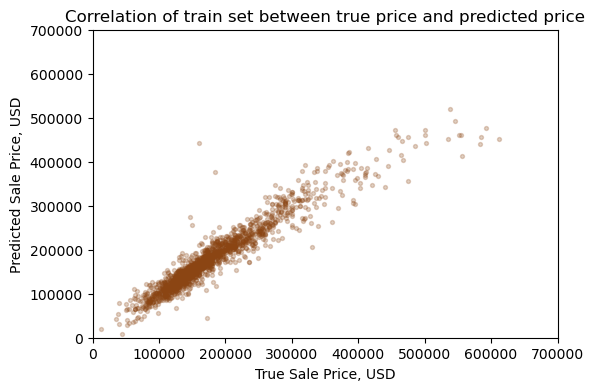

In [122]:
plt.figure(figsize=(6, 4))
tr_price = y_train
predicted_price = y_hat_train
plt.scatter(tr_price, predicted_price, color = 'saddlebrown', s = 8, alpha =1/4)
plt.xlabel('True Sale Price, USD')
plt.ylabel('Predicted Sale Price, USD')
plt.xlim(0, 700000)
plt.ylim(0, 700000)
plt.title('Correlation of train set between true price and predicted price');

In [123]:
resids = y_train - y_hat_train

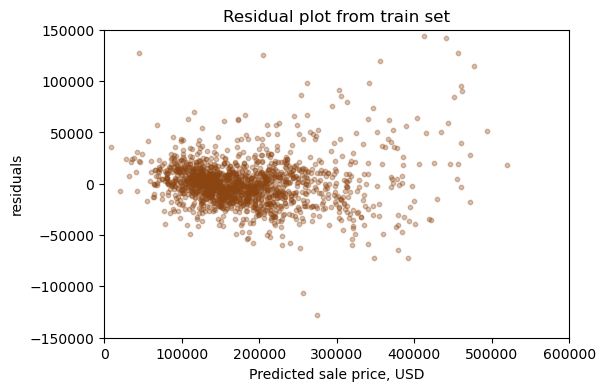

In [124]:
plt.figure(figsize=(6, 4))
plt.scatter(y_hat_train, resids, color = 'saddlebrown', s = 10, alpha =1/3)
plt.xlabel('Predicted sale price, USD')
plt.ylabel('residuals')
plt.xlim(0, 600000)
plt.ylim(-150000, 150000)
plt.title('Residual plot from train set');

### X_test

In [125]:
lr.score(X_test, y_test)

0.8991290624933048

In [126]:
y_hat_test = lr.predict(X_test)

In [127]:
sse = np.sum((y_test - y_hat_test)**2)
sse

246323083849.54733

In [128]:
mse = np.mean((y_test - y_hat_test)**2)
mse

599326238.0767576

In [129]:
metrics.mean_absolute_error(y_test, y_hat_test)

16658.131901596513

In [130]:
np.mean(cross_val_score(lr, X_test, y_test, cv = 5))

0.8435554199590319

In [131]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, shuffle=True, random_state = 2024)
np.mean(cross_val_score(lr, X_test, y_test, cv = kf))

0.811079530406712

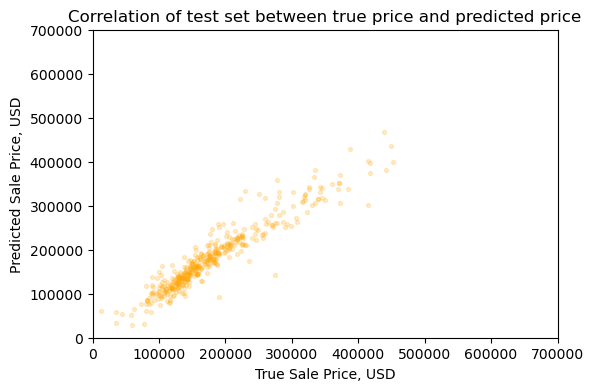

In [132]:
plt.figure(figsize = (6, 4))
tr_price = y_test
predicted_price = y_hat_test
plt.scatter(tr_price, predicted_price, color = 'orange', s= 8, alpha = 1/5)
plt.xlabel('True Sale Price, USD')
plt.ylabel('Predicted Sale Price, USD')
plt.xlim(0, 700000)
plt.ylim(0, 700000)
plt.title('Correlation of test set between true price and predicted price');

In [133]:
resids = y_test - y_hat_test

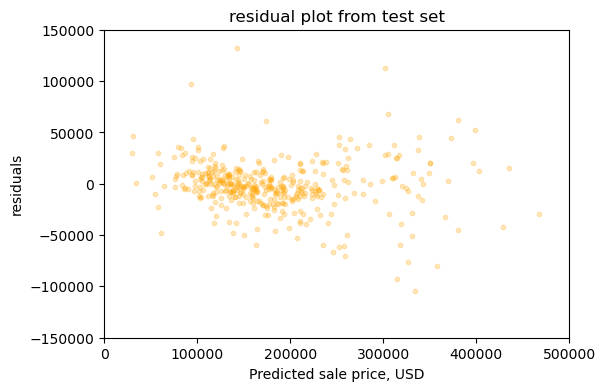

In [134]:
plt.figure(figsize = (6,4))
plt.scatter(y_hat_test, resids, color = 'orange', s = 10, alpha = 1/4)
plt.xlabel('Predicted sale price, USD')
plt.ylabel('residuals')
plt.xlim(0, 500000)
plt.ylim(-150000, 150000)
plt.title('residual plot from test set');

In [135]:
# setrain.drop(['Electrical_Mix', 'Neighborhood_Landmrk'], axis = 1, inplace = True)

### Predicting sale price for the Test data
#### Cleaning and EDA of Test data

In [136]:
test = pd.read_csv('./datasets/test.csv')

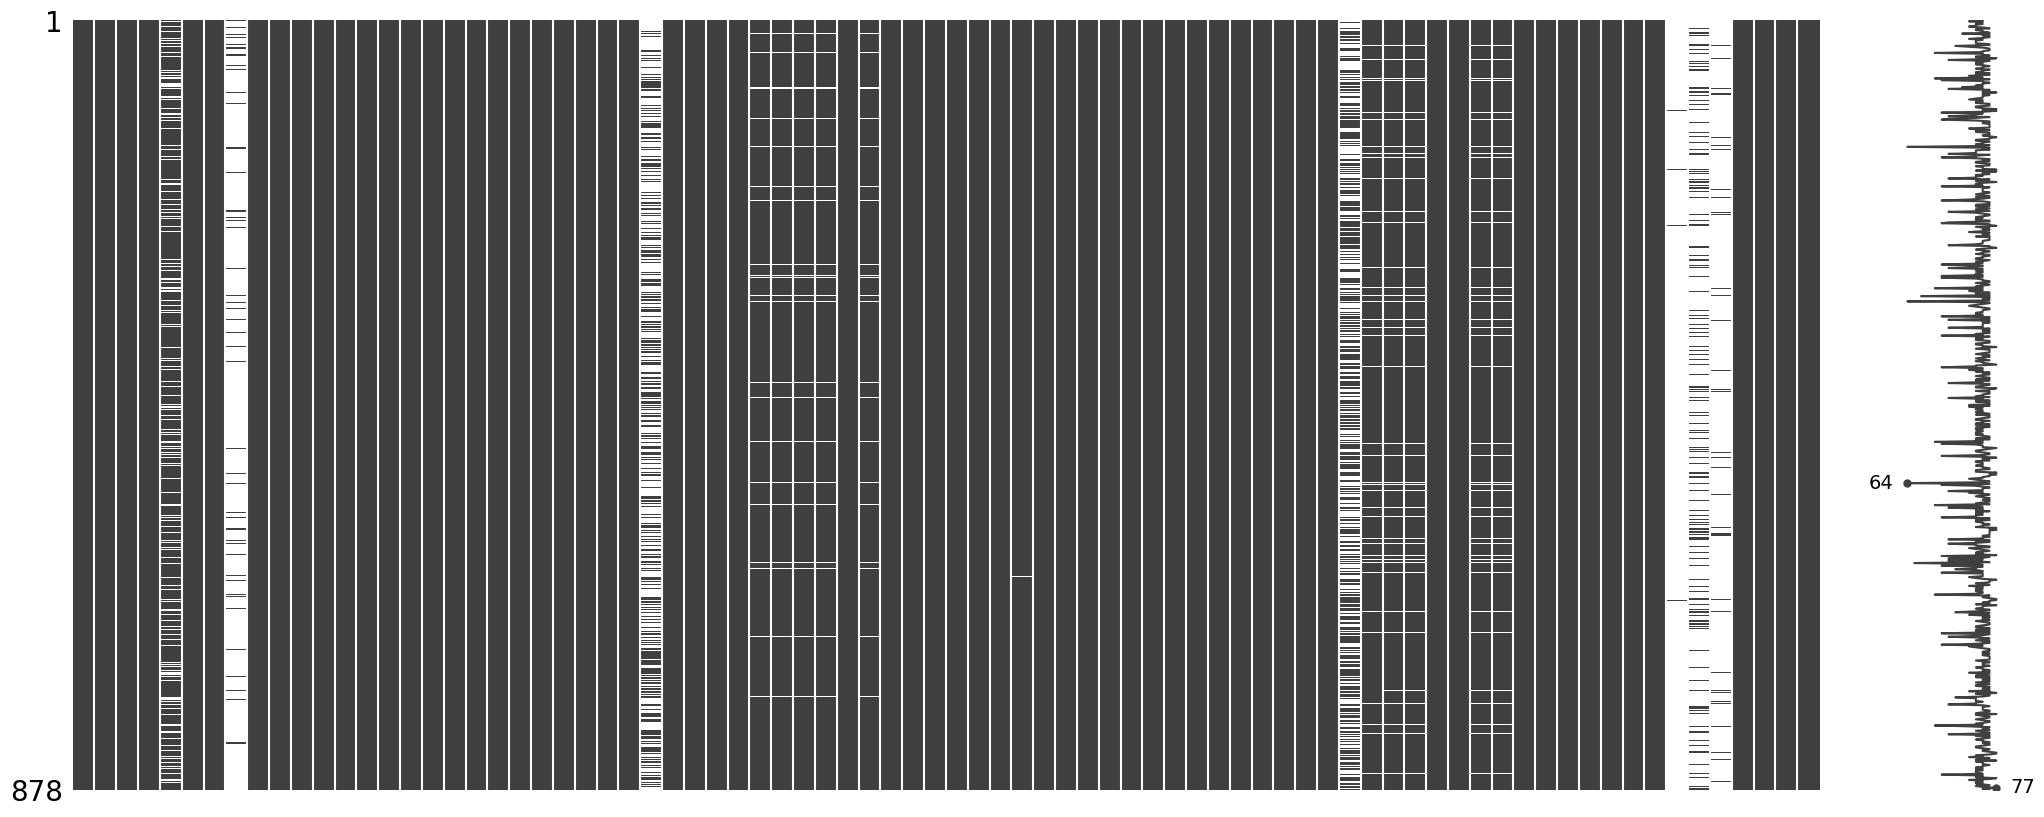

In [137]:
msno.matrix(test);

#### Clean the test data same way as train data set was cleaned

In [138]:
# drop columns that were dropped from training set
test = test.drop(columns = ['Garage Qual','Condition 1','Misc Feature', 
                            'Fence','Pool QC', 'Fireplace Qu','Mas Vnr Type', 'Alley'])

In [139]:
test = test.replace(' ', np.nan)
test = test.replace('nan', np.nan)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 72 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Lot Shape        878 non-null    object 
 8   Land Contour     878 non-null    object 
 9   Utilities        878 non-null    object 
 10  Lot Config       878 non-null    object 
 11  Land Slope       878 non-null    object 
 12  Neighborhood     878 non-null    object 
 13  Condition 2      878 non-null    object 
 14  Bldg Type        878 non-null    object 
 15  House Style      878 non-null    object 
 16  Overall Qual     878 non-null    int64  
 17  Overall Cond    

In [140]:
# fill the 'NaN' cells with comparing values from next column, mean of column for numerical values or mode of the column for object columsn
test['Garage Yr Blt'] = test['Garage Yr Blt'].fillna(test['Year Built'])

test = test.fillna(test[['Garage Area', 'Garage Cars', 'Bsmt Half Bath', 
               'Bsmt Full Bath', 'Total Bsmt SF', 'Bsmt Unf SF', 
               'BsmtFin SF 2', 'BsmtFin SF 1', 'Mas Vnr Area', 'Lot Frontage']].mean())

for column in ['Garage Cond', 'Garage Finish', 'Garage Type', 'BsmtFin Type 2', 
                         'BsmtFin Type 1', 'Bsmt Exposure', 'Bsmt Cond', 
                           'Bsmt Qual', 'Electrical']: 
                        test[column].fillna(test[column].mode()[0], inplace=True)

In [141]:
test.shape

(878, 72)

In [142]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.000000,9142,Pave,Reg,Lvl,AllPub,...,0,60,112,0,0,0,0,4,2006,WD
1,2718,905108090,90,RL,69.545961,9662,Pave,IR1,Lvl,AllPub,...,170,0,0,0,0,0,0,8,2006,WD
2,2414,528218130,60,RL,58.000000,17104,Pave,IR1,Lvl,AllPub,...,100,24,0,0,0,0,0,9,2006,New
3,1989,902207150,30,RM,60.000000,8520,Pave,Reg,Lvl,AllPub,...,0,0,184,0,0,0,0,7,2007,WD
4,625,535105100,20,RL,69.545961,9500,Pave,IR1,Lvl,AllPub,...,0,76,0,0,185,0,0,7,2009,WD


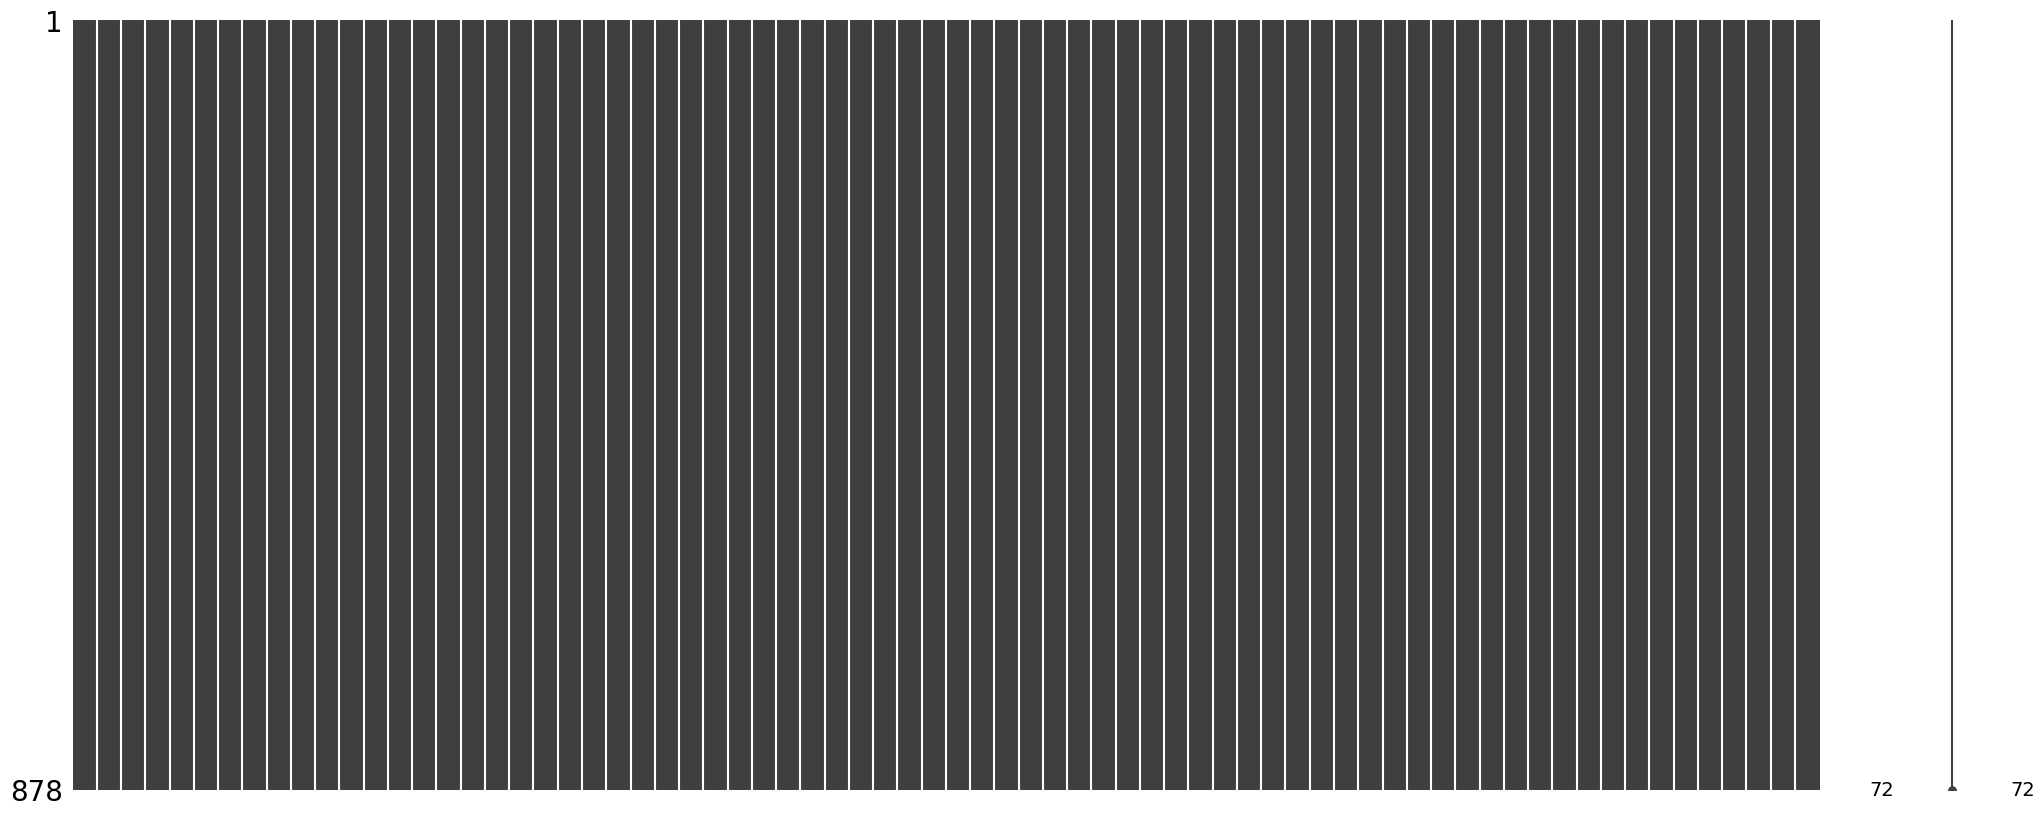

In [143]:
msno.matrix(test);

### dummifying the object columns

In [144]:
# extract columns with catagorical_variables
dat_types = test.dtypes
cat_cols = dat_types[dat_types == 'object'].index
cat_col_test = test[cat_cols]
cat_col_test.shape

(878, 34)

In [147]:
# apply OneHotEncoder to dummify catagorical variables
ohe = OneHotEncoder(drop = 'first', sparse_output = False).set_output(transform = 'pandas')
ohetransform = ohe.fit_transform(cat_col_test)
ohetransform.shape

(878, 166)

In [148]:
num_cols_test = test.select_dtypes(include = [np.number])
num_cols_test.shape

(878, 38)

In [149]:
#  concat catagorical and numerical columns
test_dums = pd.concat([num_cols_test, ohetransform], axis = 1)
test_dums.shape

(878, 204)

In [150]:
test_dums.to_csv('./datasets/test_cleaned_02182024AAA.csv', index = False)

In [151]:
test_dumsd = test_dums.drop(columns = ['Exterior 1st_PreCast','Exterior 2nd_Other','Exterior 2nd_PreCast', 'Heating_GasA','Kitchen Qual_Po','Sale Type_VWD','Roof Matl_Metal','Roof Matl_Roll'])
test_dumsd.shape

(878, 196)

In [152]:
test_dumsd.to_csv('./datasets/test_cleaned_02182024.csv', index = False)

In [153]:
y_test_predict = lr.predict(test_dumsd)
y_test_predict

array([152600.55454462, 143956.82329952, 217241.29877356, 112115.86963616,
       181240.90584789,  89516.99227156, 108525.40762664, 164346.151493  ,
       167928.78998289, 170053.86731206, 130263.42169877, 124911.20507203,
       134014.38117972, 303134.83791709, 119509.8224463 , 143962.68516711,
       176613.73765481, 118655.19894228, 190025.91185607, 174559.45230121,
       160654.94088246, 125913.96971309, 161172.91330849, 164892.42430544,
       165096.14723253, 132404.32787705, 120122.90765271, 131462.34340495,
       169276.41977685,  44864.71678656, 100265.23214583, 104968.23654857,
       165036.82245123, 152685.87853154, 216002.61794146, 178283.21384943,
       111853.22493556,  81229.78271407, 142446.66668133, 190313.04698552,
       156231.91337318, 202306.14680616, 150439.30518366, 156408.97690797,
       200593.72250026,  93056.6940193 , 216525.15338318, 137212.02558518,
       139038.35825457, 123664.90426779, 100683.86237436, 204542.40941918,
       225583.0421943 , 1

### Predicted housing prices!!!

In [154]:
lr_price_pr = pd.DataFrame(y_test_predict)
lr_price_pr.head()

,0
0,152600.554545
1,143956.823300
2,217241.298774
3,112115.869636
4,181240.905848


In [155]:
pricepredict = lr_price_pr.rename(columns={0: 'SalePrice'})
test['SalePrice'] = pricepredict['SalePrice']

In [156]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,2658,902301120,190,RM,69.000000,9142,Pave,Reg,Lvl,AllPub,...,60,112,0,0,0,0,4,2006,WD,152600.554545
1,2718,905108090,90,RL,69.545961,9662,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,0,8,2006,WD,143956.823300
2,2414,528218130,60,RL,58.000000,17104,Pave,IR1,Lvl,AllPub,...,24,0,0,0,0,0,9,2006,New,217241.298774
3,1989,902207150,30,RM,60.000000,8520,Pave,Reg,Lvl,AllPub,...,0,184,0,0,0,0,7,2007,WD,112115.869636
4,625,535105100,20,RL,69.545961,9500,Pave,IR1,Lvl,AllPub,...,76,0,0,185,0,0,7,2009,WD,181240.905848


In [157]:
submission = test[['Id', 'SalePrice']] 

In [158]:
submission.head(5)

,Id,SalePrice
0,2658,152600.554545
1,2718,143956.823300
2,2414,217241.298774
3,1989,112115.869636
4,625,181240.905848


In [159]:
submission.set_index('Id', inplace = True) 

In [160]:
submission.head()

,SalePrice
Id,
2658,152600.554545
2718,143956.823300
2414,217241.298774
1989,112115.869636
625,181240.905848


In [161]:
submission.to_csv('submission.csv')

In [162]:
# submission = test[['Id', 'SalePrice']] 
# submission.set_index('Id', inplace = True) 
# submission.to_csv('submission.csv')

In [163]:
# submission.to_csv('./datasets/submission.csv', index = None)

### Polynomials

In [164]:
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                     test_size = 0.2, random_state = 42)

In [165]:
poly = PolynomialFeatures(degree=2, include_bias=True)
x_trainp = poly.fit_transform(X_train)
x_testp = poly.transform(X_test)

In [166]:
x_trainp.shape

(1640, 19503)

In [167]:
x_testp.shape

(411, 19503)

In [168]:
lrp = LinearRegression()

In [169]:
lrp.fit(x_trainp, y_train)

LinearRegression()

In [170]:
lrp.score(x_trainp, y_train)

0.9783680387784001

In [171]:
y_hat_trainp = lrp.predict(x_trainp)

In [172]:
metrics.mean_absolute_error(y_train, y_hat_trainp)

8802.747179322798

In [173]:
(cross_val_score(lrp, x_trainp, y_train, cv =5))

array([-0.45175999,  0.67669447, -0.06680434, -4.54344048, -0.30587996])

In [174]:
np.mean(cross_val_score(lrp, x_trainp, y_train, cv =5))

-0.9382380598130184

In [181]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, shuffle=True, random_state = 2024)
np.mean(cross_val_score(lrp, x_trainp, y_train, cv =kf))

-0.371704085022915

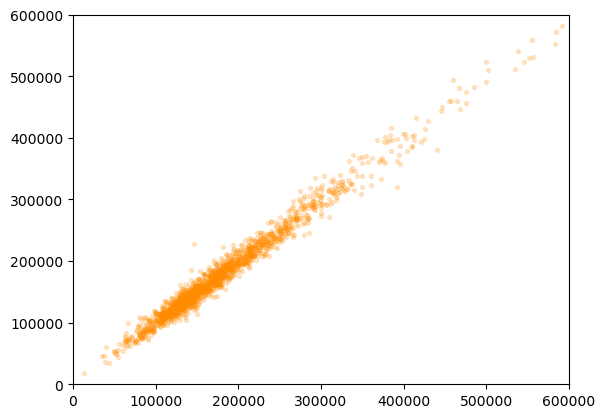

In [176]:
plt.scatter(y_train, y_hat_trainp, color = 'darkorange', s= 8, alpha = 1/5)
plt.xlim(0, 600000)
plt.ylim(0, 600000);

In [177]:
residuals = y_train - y_hat_train

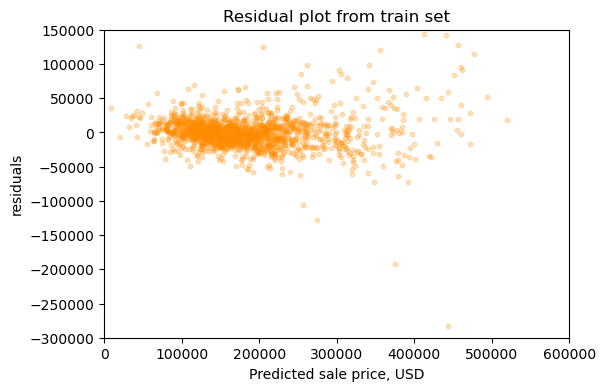

In [178]:
plt.figure(figsize = (6,4))
plt.scatter(y_hat_train, residuals, color = 'darkorange', s = 10, alpha = 1/4);

plt.xlabel('Predicted sale price, USD')
plt.ylabel('residuals')
plt.xlim(0, 600000)
plt.ylim(-300000, 150000)
plt.title('Residual plot from train set');

In [179]:
y_hat_test = lrp.predict(x_testp)

In [180]:
metrics.mean_absolute_error(y_test, y_hat_test)

23416.798912315124

In [ ]:
(cross_val_score(lrp, x_testp, y_hat_test, cv =5))

In [ ]:
plt.scatter(y_test, y_hat_test, color = 'darkorange', s= 8, alpha = 1/5)
plt.xlim(0, 800000)
plt.ylim(0, 800000);

In [ ]:
residuals = y_test - y_hat_test

In [ ]:
plt.figure(figsize = (6,4))
plt.scatter(y_hat_test, residuals, color = 'darkorange', s = 10, alpha = 1/4)
plt.xlabel('Predicted sale price, USD')
plt.ylabel('Residuals')
plt.xlim(0, 600000)
plt.ylim(-300000, 150000)
plt.title('Residual plot from test set');

In [ ]:
x_hat_test = poly.transform(X_test)

In [ ]:
y_hat_test = lrp.predict(x_hat_test)

In [ ]:
polypredict = pd.DataFrame(y_hat_testsub)
polypredict.shape

In [ ]:
np.mean(cross_val_score(lrp, X_trainp, y_trainp, cv = 5))

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, shuffle=True, random_state = 2024)
np.mean(cross_val_score(lr, X_trainp, y_trainp, cv = kf))

### Test set on Poly regression

In [ ]:
test_poly = poly.transform(test_dumsd)

In [ ]:
poly_test = lrp.predict(test_poly)

In [ ]:
poly_test_pred = pd.DataFrame(poly_test)

In [ ]:
corr = poly_test_pred.corrwith(lr_price_pr)
print(corr)

In [ ]:
poly_test_pred.head()

In [ ]:
submission = test[['Id', 'SalePrice']] 
submission.set_index('Id', inplace = True) 
submission.to_csv('submission.csv')

In [ ]:
poly_test_pred.corrwith(lr_price_pr, axis = 0) 

In [ ]:
lr_price_pr.corrwith(poly_test_pred[0])

In [ ]:
plt.scatter(poly_test_pred, lr_price_pr);
plt.xlim(0, 600000)
plt.ylim(0, 600000);

In [ ]:
y_hat_testp = lrp.predict(X_testp)

In [ ]:
mse = np.mean((y_testp - y_hat_testp)**2)
mse

In [ ]:
metrics.mean_absolute_error(y_testp, y_hat_testp)

In [ ]:
plt.figure(figsize = (8, 6))
tr_price = y_testp
predicted_price = y_hat_testp
plt.scatter(tr_price, predicted_price, color = 'darkorange', s= 8, alpha = 1/5)
plt.xlabel('True Sale Price, USD')
plt.ylabel('Predicted Sale Price, USD')
plt.xlim(0, 700000)
plt.ylim(0, 700000)
plt.title('Correlation of test set between true price and predicted price');

In [ ]:
residuals = y_testp - y_hat_testp

In [ ]:
plt.scatter(y_hat_testp, residuals, color = 'darkorange', s = 10, alpha = 1/4);

### Poly prediction for test set

In [ ]:
test_dumsd = test_dums.drop(columns = ['Exterior 1st_PreCast','Exterior 2nd_Other','Exterior 2nd_PreCast','Heating_GasA','Sale Type_VWD','Roof Matl_Metal','Roof Matl_Roll'])
test_dumsd.shape

In [ ]:
#'Roof Matl_Roll' 

In [ ]:
poly = PolynomialFeatures(degree = 2, include_bias = False)
X_poly_test = poly.fit_transform(test_dumsd)

In [ ]:
X_poly_test.shape

In [ ]:
predict_ = poly.transform(test_dumsd)

In [ ]:
predict_

In [ ]:
y_poly_test_pred = lrp.predict(X_poly_test)

In [ ]:
y_poly_test_pred